## IMPORTING THE LIBRARIES

In [1]:
!pip install mxnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 43.2 MB/s eta 0:00:00:00:0100:01


In [2]:
!pip install gluonts==0.7.6

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 7.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 9.4 MB/s eta 0:00:000:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 42.5 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 24.1 MB/s eta 0:00:00:00:01
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.1
    Uninstalling pandas-2.2.1:
      Successfully uninstalled pandas-2.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask-expr 1.0.5 requires pandas>=2, but you have pandas 1.5.3 which is incompatible.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [4]:
import mxnet
import gluonts

In [5]:
from gluonts.dataset.util import to_pandas
from gluonts.dataset.repository.datasets import get_dataset
from gluonts.model.deepar import DeepAREstimator
from gluonts.evaluation.backtest import make_evaluation_predictions
from gluonts.evaluation import Evaluator
from gluonts.model.predictor import Predictor
from gluonts.dataset.common import ListDataset
from gluonts.transform import InstanceSplitter
from gluonts.dataset.field_names import FieldName
from gluonts.transform.sampler import UniformSplitSampler

In [6]:
pip install --upgrade pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 50.3 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
autovizwidget 0.21.0 requires pandas<2.0.0,>=0.20.1, but you have pandas 2.2.2 which is incompatible.
gluonts 0.7.6 requires pandas~=1.0, but you have pandas 2.2.2 which is incompatible.
hdijupyterutils 0.21.0 requires pandas<2.0.0,>=0.17.1, but you have pandas 2.2.2 which is incompatible.
sparkmagic 0.21.0 requires pandas<2.0.0,>=0.17.1, but you have pandas 2.2.2 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


## IMPORTING THE DATASET

In [55]:
input_filename = "Speed_Camera_Violations.csv"

In [56]:
speed_camera_violations_data = pd.read_csv(open(input_filename, "rb"), encoding="utf-8")

## DATASET EXPLORATION

### A) Top 5 and Bottom 5 instances

In [58]:
speed_camera_violations_data.head()

AttributeError: 'Index' object has no attribute '_format_flat'

           ADDRESS CAMERA ID VIOLATION DATE  VIOLATIONS  X COORDINATE  \
0  1111 N HUMBOLDT    CHI010     04/10/2015          67           NaN   
1  1111 N HUMBOLDT    CHI010     04/25/2015          71           NaN   
2  1111 N HUMBOLDT    CHI010     04/14/2015          38           NaN   
3  1111 N HUMBOLDT    CHI010     04/16/2015          55           NaN   
4  1111 N HUMBOLDT    CHI010     04/24/2015          54           NaN   

   Y COORDINATE  LATITUDE  LONGITUDE LOCATION  
0           NaN       NaN        NaN      NaN  
1           NaN       NaN        NaN      NaN  
2           NaN       NaN        NaN      NaN  
3           NaN       NaN        NaN      NaN  
4           NaN       NaN        NaN      NaN  

In [10]:
speed_camera_violations_data.tail()

AttributeError: 'Index' object has no attribute '_format_flat'

                      ADDRESS CAMERA ID VIOLATION DATE  VIOLATIONS  \
378721         3314 W 16TH ST    CHI195     03/31/2024          10   
378722         2443 N ASHLAND    CHI091     03/31/2024          94   
378723  2501 W IRVING PARK RD    CHI201     03/31/2024         116   
378724     5454 W IRVING PARK    CHI050     03/31/2024          51   
378725         4436 N WESTERN    CHI094     03/31/2024          27   

        X COORDINATE  Y COORDINATE   LATITUDE  LONGITUDE  \
378721  1.154436e+06  1.891886e+06  41.859156 -87.708596   
378722  1.165293e+06  1.916479e+06  41.926419 -87.668042   
378723  1.158989e+06  1.926443e+06  41.953893 -87.690933   
378724  1.139043e+06  1.926097e+06  41.953330 -87.764267   
378725  1.159529e+06  1.929556e+06  41.962422 -87.688862   

                                        LOCATION  
378721   (41.85915555784436, -87.70859604599919)  
378722  (41.926418831263994, -87.66804246498943)  
378723   (41.95389316007357, -87.69093346821148)  
378724   (41.9

### B) Dataset description and datatypes

In [11]:
speed_camera_violations_data.describe()

AttributeError: 'Index' object has no attribute '_format_flat'

          VIOLATIONS  X COORDINATE  Y COORDINATE       LATITUDE      LONGITUDE
count  378726.000000  3.645900e+05  3.645900e+05  364590.000000  364590.000000
mean       40.146650  1.159448e+06  1.893475e+06      41.863399     -87.690201
std        53.942583  1.633864e+04  3.222997e+04       0.088638       0.059455
min         1.000000  1.121638e+06  1.820629e+06      41.663174     -87.828317
25%         8.000000  1.149437e+06  1.868078e+06      41.793493     -87.726589
50%        22.000000  1.159529e+06  1.898488e+06      41.877243     -87.688862
75%        50.000000  1.167695e+06  1.921047e+06      41.939258     -87.661138
max       827.000000  1.203645e+06  1.947252e+06      42.011620     -87.529848

In [12]:
speed_camera_violations_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378726 entries, 0 to 378725
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ADDRESS         378726 non-null  object 
 1   CAMERA ID       378721 non-null  object 
 2   VIOLATION DATE  378726 non-null  object 
 3   VIOLATIONS      378726 non-null  int64  
 4   X COORDINATE    364590 non-null  float64
 5   Y COORDINATE    364590 non-null  float64
 6   LATITUDE        364590 non-null  float64
 7   LONGITUDE       364590 non-null  float64
 8   LOCATION        364590 non-null  object 
dtypes: float64(4), int64(1), object(4)
memory usage: 26.0+ MB


### C) Number of rows and columns

In [13]:
print("Number of rows: ", speed_camera_violations_data.shape[0])
print("Number of columns: ", speed_camera_violations_data.shape[1])

Number of rows:  378726
Number of columns:  9


## DATASET CLEANING

### A) Removing duplicate rows

In [14]:
speed_camera_violations_data.drop_duplicates(inplace=True)

In [15]:
print("Number of rows after removing duplicates: ", speed_camera_violations_data.shape[0])
print("Number of columns after removing duplicates: ", speed_camera_violations_data.shape[1])

Number of rows after removing duplicates:  378726
Number of columns after removing duplicates:  9


### B) Converting the 'Date' column from object to datetime format and creating a new column VIOLATION_DATE

In [16]:
speed_camera_violations_data["VIOLATION_DT"] = pd.to_datetime(speed_camera_violations_data["VIOLATION DATE"])

In [17]:
speed_camera_violations_data.set_index('VIOLATION_DT', inplace=True)

In [18]:
speed_camera_violations_data = speed_camera_violations_data.reset_index()

In [27]:
speed_camera_violations_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378726 entries, 0 to 378725
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   VIOLATION_DT    378726 non-null  datetime64[ns]
 1   ADDRESS         378726 non-null  object        
 2   CAMERA ID       378721 non-null  object        
 3   VIOLATION DATE  378726 non-null  object        
 4   VIOLATIONS      378726 non-null  int64         
 5   X COORDINATE    378726 non-null  float64       
 6   Y COORDINATE    378726 non-null  float64       
 7   LATITUDE        378726 non-null  float64       
 8   LONGITUDE       378726 non-null  float64       
 9   LOCATION        378726 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 28.9+ MB


In [28]:
speed_camera_violations_data.tail()

AttributeError: 'Index' object has no attribute '_format_flat'

       VIOLATION_DT                ADDRESS CAMERA ID VIOLATION DATE  \
378721   2024-03-31         3314 W 16TH ST    CHI195     03/31/2024   
378722   2024-03-31         2443 N ASHLAND    CHI091     03/31/2024   
378723   2024-03-31  2501 W IRVING PARK RD    CHI201     03/31/2024   
378724   2024-03-31     5454 W IRVING PARK    CHI050     03/31/2024   
378725   2024-03-31         4436 N WESTERN    CHI094     03/31/2024   

        VIOLATIONS  X COORDINATE  Y COORDINATE   LATITUDE  LONGITUDE  \
378721          10  1.154436e+06  1.891886e+06  41.859156 -87.708596   
378722          94  1.165293e+06  1.916479e+06  41.926419 -87.668042   
378723         116  1.158989e+06  1.926443e+06  41.953893 -87.690933   
378724          51  1.139043e+06  1.926097e+06  41.953330 -87.764267   
378725          27  1.159529e+06  1.929556e+06  41.962422 -87.688862   

                                        LOCATION  
378721   (41.85915555784436, -87.70859604599919)  
378722  (41.926418831263994, -87.66804

### C) Additional Exploration

In [21]:
unique_addresses = speed_camera_violations_data.ADDRESS.unique()
number_of_addresses = len(unique_addresses)
print("Unique Addresses: {}".format(number_of_addresses))

Unique Addresses: 182


In [22]:
idx = pd.date_range(speed_camera_violations_data.VIOLATION_DT.min(), 
                    speed_camera_violations_data.VIOLATION_DT.max())

print("Minimum violation date is {}, Maximum violation date is {}".format(
        speed_camera_violations_data.VIOLATION_DT.min(), speed_camera_violations_data.VIOLATION_DT.max()))

Minimum violation date is 2014-07-01 00:00:00, Maximum violation date is 2024-03-31 00:00:00


### D) Impute 0 for location fields which are empty

In [23]:
columns_to_replace = ['LONGITUDE', 'LATITUDE', 'X COORDINATE', 'Y COORDINATE', 'LOCATION']

In [24]:
speed_camera_violations_data[columns_to_replace] = speed_camera_violations_data[columns_to_replace].fillna(0)

### E) Impute 0 for 'VIOLATIONS' where it is empty

In [29]:
speed_camera_violations_data['VIOLATIONS'] = speed_camera_violations_data['VIOLATIONS'].fillna(0)

In [31]:
sum(speed_camera_violations_data['VIOLATIONS'].isna())

0

## DATASET VISUALIZATIONS

### A) Distribution of Speed Violations

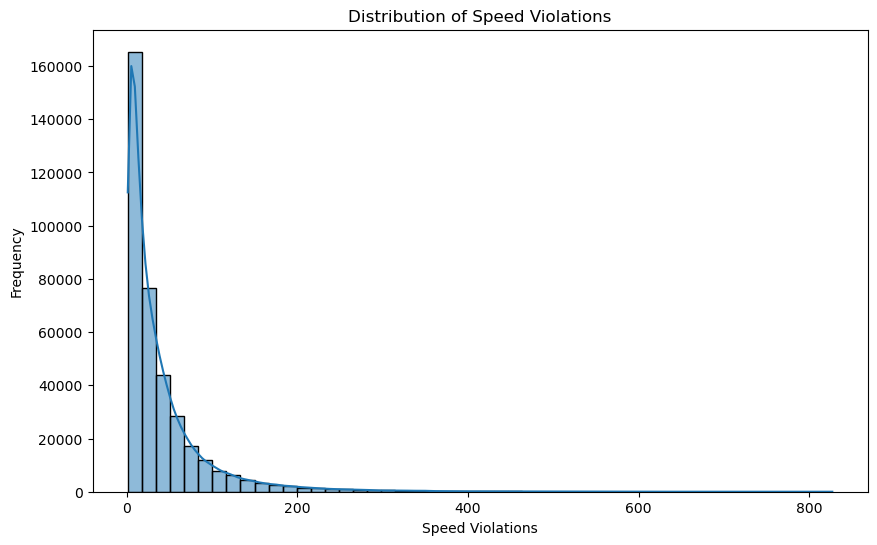

In [46]:
plt.figure(figsize=(10, 6))
sns.histplot(speed_camera_violations_data['VIOLATIONS'], bins=50, kde=True)
plt.xlabel('Speed Violations')
plt.ylabel('Frequency')
plt.title('Distribution of Speed Violations')
plt.show()

### B) Distribution of Speed Violations by Year

A box plot showing the distribution of the speed violation counts by years.

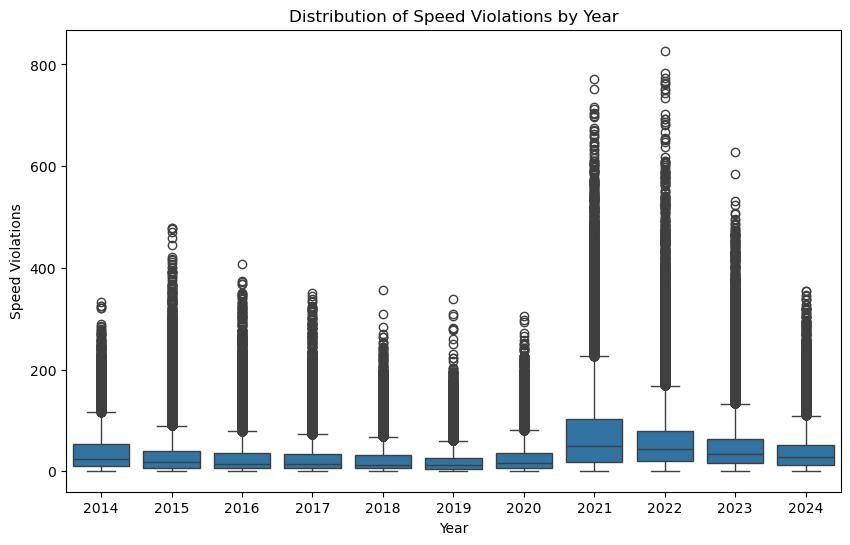

In [37]:
speed_camera_violations_data['YEAR'] = speed_camera_violations_data['VIOLATION_DT'].dt.year

plt.figure(figsize=(10, 6))
sns.boxplot(x='YEAR', y='VIOLATIONS', data=speed_camera_violations_data)
plt.xlabel('Year')
plt.ylabel('Speed Violations')
plt.title('Distribution of Speed Violations by Year')
plt.show()

### C) Distribution of Total Speed Violations grouped by Year

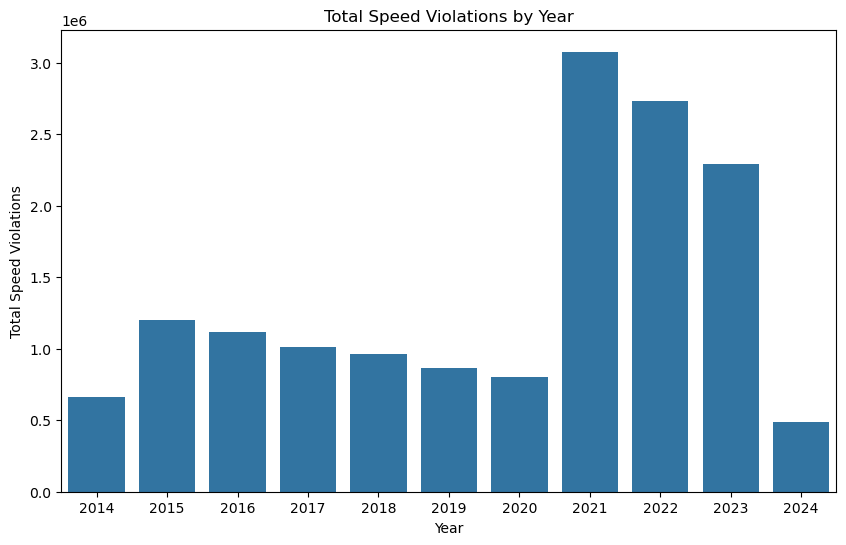

In [38]:
violations_per_year = speed_camera_violations_data.groupby('YEAR')['VIOLATIONS'].sum().reset_index()

# Plotting the total violations per year
plt.figure(figsize=(10, 6))
sns.barplot(x='YEAR', y='VIOLATIONS', data=violations_per_year)
plt.xlabel('Year')
plt.ylabel('Total Speed Violations')
plt.title('Total Speed Violations by Year')
plt.show()

### D) Distribution of Speed Violations by Month

A box plot showing the distribution of the speed violation counts by months.

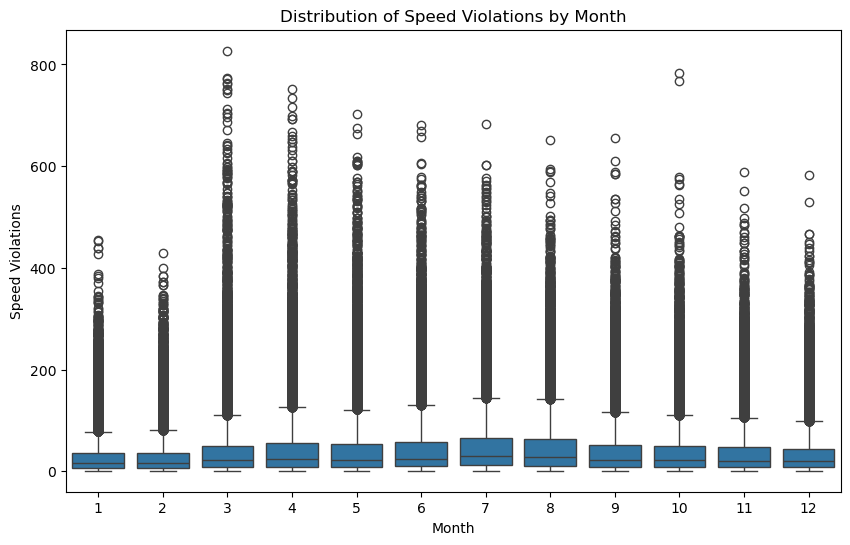

In [39]:
speed_camera_violations_data['MONTH'] = speed_camera_violations_data['VIOLATION_DT'].dt.month
plt.figure(figsize=(10, 6))
sns.boxplot(x='MONTH', y='VIOLATIONS', data=speed_camera_violations_data)
plt.xlabel('Month')
plt.ylabel('Speed Violations')
plt.title('Distribution of Speed Violations by Month')
plt.show()

### E) Chicago Speed Camera Violations by Address

A line plot showing the trend of speed camera violations over time for each unique address in the dataset. Each line represents the violations trend for a specific address.

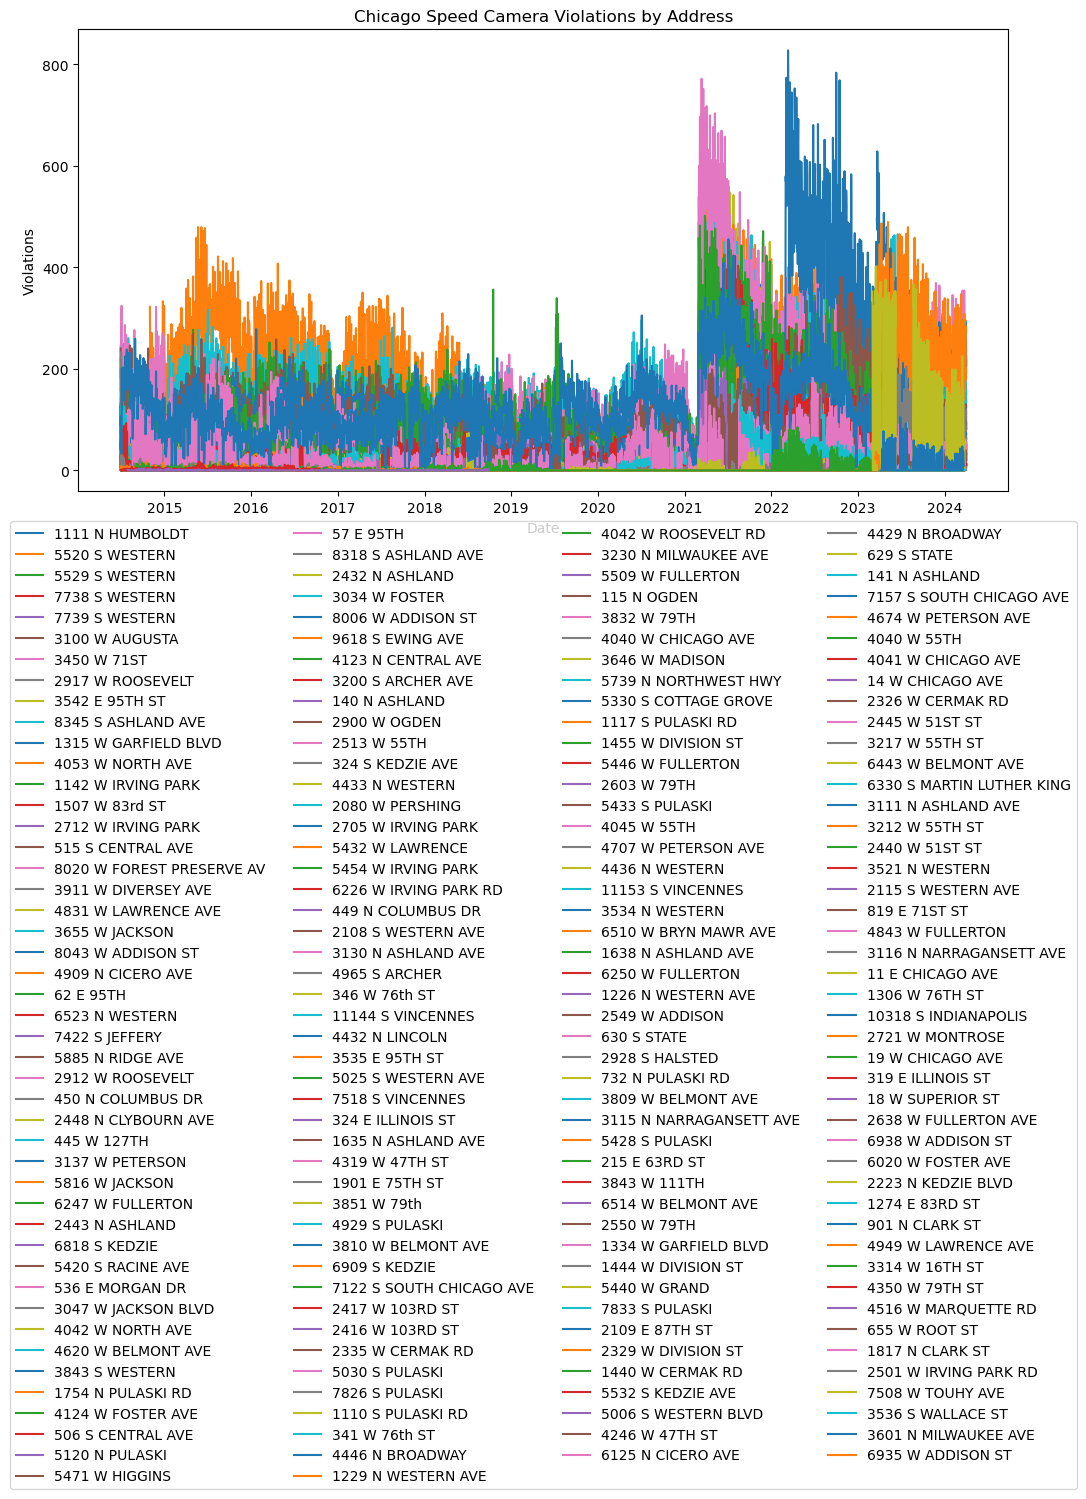

In [52]:
violation_list = []

for address in unique_addresses:
    temp_df = speed_camera_violations_data.loc[speed_camera_violations_data['ADDRESS'] == address, ['VIOLATION_DT', 'VIOLATIONS']]
    temp_df['VIOLATION_DT'] = pd.to_datetime(temp_df['VIOLATION_DT'])
    temp_df.set_index('VIOLATION_DT', inplace=True)
    temp_df = temp_df.resample('D').sum()
    violation_list.append(temp_df)

plt.figure(figsize=(12, 6), dpi=100, facecolor="w")
for address, data in zip(unique_addresses, violation_list):
    plt.plot(data.index, data['VIOLATIONS'], label=address)

plt.ylabel("Violations")
plt.xlabel("Date")
plt.title("Chicago Speed Camera Violations by Address")
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.05), shadow=False, ncol=4)
plt.show()

### F) Trend and Seasonality of Chicago Speed Violations

The trend and seasonality of Chicago speed violations over time, including both the raw data and the smoothed trends using rolling means and standard deviations.

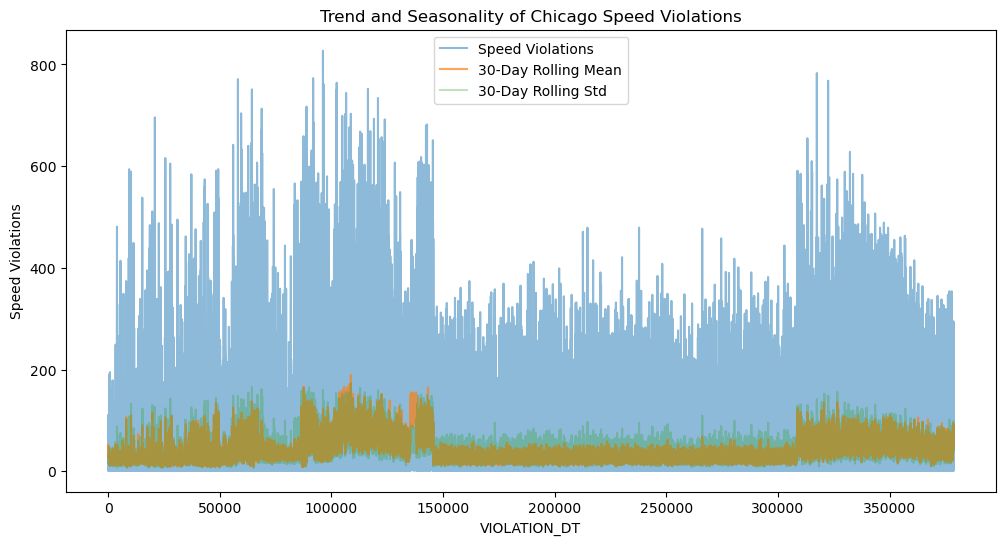

In [64]:
plt.figure(figsize=(12, 6))
speed_camera_violations_data['VIOLATIONS'].plot(label='Speed Violations', alpha=0.5)
speed_camera_violations_data['VIOLATIONS'].rolling(window=30).mean().plot(label='30-Day Rolling Mean', alpha=0.7)
speed_camera_violations_data['VIOLATIONS'].rolling(window=30).std().plot(label='30-Day Rolling Std', alpha=0.3)
plt.xlabel('VIOLATION_DT')
plt.ylabel('Speed Violations')
plt.title('Trend and Seasonality of Chicago Speed Violations')
plt.legend()
plt.show()

## DATASET SPLIT

In [41]:
# Define train-test split (e.g., 80-20)

train_data = speed_camera_violations_data.iloc[:int(len(speed_camera_violations_data)*0.8)]
test_data = speed_camera_violations_data.iloc[int(len(speed_camera_violations_data)*0.8):]

In [42]:
train_data.shape

(302980, 12)

In [43]:
test_data.shape

(75746, 12)

### A) Training Dataset

In [44]:
train_time_series = []

for idx, row in train_data.iterrows():
    train_time_series.append({
        "start": row["VIOLATION_DT"],
        "target": row["VIOLATIONS"],
        "time_feat": [row["YEAR"], row["MONTH"]],
    })

### B) Test Dataset

In [45]:
test_time_series = []

for idx, row in test_data.iterrows():
    test_time_series.append({
        "start": row["VIOLATION_DT"],
        "target": row["VIOLATIONS"],
        "time_feat": [row["YEAR"], row["MONTH"]]
    })

### C) Create ListDataset for training and test

In [46]:
train_dataset = ListDataset(train_time_series, freq="1D")
test_dataset = ListDataset(test_time_series, freq="1D")

## TRAINING THE DEEPAR MODEL

In [47]:
# Defining the length for predictions for the DeepAR model

prediction_length = 30

In [48]:
estimator = DeepAREstimator(
    freq = "1D",  # Frequency of the time series ("1D" for daily frequency)
    prediction_length = prediction_length,  # Length of the prediction horizon
    num_layers = 2,  # Number of layers in the RNN
    num_cells = 40,  # Number of cells in each layer of the RNN
    cell_type = 'lstm',  # Type of RNN cell (e.g., 'lstm', 'gru')
    dropout_rate = 0.1,  # Dropout rate for the RNN layers
)

In [49]:
from gluonts.model.deepar import DeepAREstimator
from gluonts.mx.trainer import Trainer
from gluonts.evaluation.backtest import make_evaluation_predictions

In [50]:
train_gluont_ds = ListDataset(train_time_series, freq="1D")

# Define DeepAR estimator
estimator = DeepAREstimator(
    freq="1D",
    prediction_length=30,
    num_layers=2,
    num_cells=40,
    cell_type='lstm',
    dropout_rate=0.1,
    trainer=Trainer(epochs=1)
)

# Train the model
predictor = estimator.train(train_gluont_ds)

learning rate from ``lr_scheduler`` has been overwritten by ``learning_rate`` in optimizer.


  0%|          | 0/50 [00:00<?, ?it/s]/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/gluonts/dataset/common.py:317: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  timestamp = pd.Timestamp(string, freq=freq)
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/gluonts/dataset/common.py:320: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  if isinstance(timestamp.freq, Tick):
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/gluonts/dataset/common.py:322: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  timestamp.floor(timestamp.freq), timestamp.freq
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/gluonts/dataset/common.py:321: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  return pd.Timestamp(
  0%|          | 0/50 [00:00<?, ?it/

GluonTSDataError: Array 'target' has bad shape - expected 1 dimensions, got 0.